In [1]:
import os
import sys
import random
from glob import glob
from copy import deepcopy
from pprint import pprint

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from tqdm import tqdm

# enable use of local modules
repo_dir = '/grad/bwedig/mejiro'
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

from mejiro.instruments.hwo import HWO
from mejiro.synthetic_image import SyntheticImage
from mejiro.galaxy_galaxy import GalaxyGalaxy, SampleGG, SampleBELLS, SampleSL2S
from mejiro.exposure import Exposure
from mejiro.utils import util

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

# set HWO directory
hwo_dir = os.path.join(repo_dir, 'hwo')

Warning, 5 of 20000 bins contained negative fluxes; they have been set to zero.
Warning, 3590 of 20000 bins contained negative fluxes; they have been set to zero.
Warning, 293 of 2920 bins contained negative fluxes; they have been set to zero.
Warning, 5 of 20000 bins contained negative fluxes; they have been set to zero.
Warning, 3590 of 20000 bins contained negative fluxes; they have been set to zero.
Warning, 293 of 2920 bins contained negative fluxes; they have been set to zero.


In [3]:
eac1 = HWO('EAC1')

pprint(f'aperture: {eac1.aperture}')
pprint(f'effective aperture: {eac1.effective_aperture}')
pprint(f'pixel scale: {eac1.pixel_scale}')
pprint(f'psf fwhm: {eac1.psf_fwhm}')

'aperture: 7.2 m'
'effective aperture: 7.2 m'
("pixel scale: {'FUV': <Quantity 0.00572958 arcsec / pix>, 'NUV': <Quantity "
 "0.00572958 arcsec / pix>, 'U': <Quantity 0.00572958 arcsec / pix>, 'B': "
 "<Quantity 0.00572958 arcsec / pix>, 'V': <Quantity 0.00572958 arcsec / pix>, "
 "'R': <Quantity 0.00572958 arcsec / pix>, 'I': <Quantity 0.00572958 arcsec / "
 "pix>, 'J': <Quantity 0.01718873 arcsec / pix>, 'H': <Quantity 0.01718873 "
 "arcsec / pix>, 'K': <Quantity 0.01718873 arcsec / pix>}")
("psf fwhm: {'FUV': <Quantity 0.01475366 arcsec>, 'NUV': <Quantity 0.01475366 "
 "arcsec>, 'U': <Quantity 0.01475366 arcsec>, 'B': <Quantity 0.01475366 "
 "arcsec>, 'V': <Quantity 0.01788144 arcsec>, 'R': <Quantity 0.02286818 "
 "arcsec>, 'I': <Quantity 0.02508123 arcsec>, 'J': <Quantity 0.03717923 "
 "arcsec>, 'H': <Quantity 0.04721172 arcsec>, 'K': <Quantity 0.06550626 "
 'arcsec>}')


In [4]:
eac2 = HWO('EAC2')

pprint(f'aperture: {eac2.aperture}')
pprint(f'effective aperture: {eac2.effective_aperture}')
pprint(f'pixel scale: {eac2.pixel_scale}')
pprint(f'psf fwhm: {eac2.psf_fwhm}')

'aperture: 6.0 m'
'effective aperture: 6.0 m'
("pixel scale: {'FUV': <Quantity 0.00687549 arcsec / pix>, 'NUV': <Quantity "
 "0.00687549 arcsec / pix>, 'U': <Quantity 0.00687549 arcsec / pix>, 'B': "
 "<Quantity 0.00687549 arcsec / pix>, 'V': <Quantity 0.00687549 arcsec / pix>, "
 "'R': <Quantity 0.00687549 arcsec / pix>, 'I': <Quantity 0.00687549 arcsec / "
 "pix>, 'J': <Quantity 0.02062648 arcsec / pix>, 'H': <Quantity 0.02062648 "
 "arcsec / pix>, 'K': <Quantity 0.02062648 arcsec / pix>}")
("psf fwhm: {'FUV': <Quantity 0.0177044 arcsec>, 'NUV': <Quantity 0.0177044 "
 "arcsec>, 'U': <Quantity 0.0177044 arcsec>, 'B': <Quantity 0.0177044 arcsec>, "
 "'V': <Quantity 0.02145773 arcsec>, 'R': <Quantity 0.02744181 arcsec>, 'I': "
 "<Quantity 0.03009747 arcsec>, 'J': <Quantity 0.04461508 arcsec>, 'H': "
 "<Quantity 0.05665407 arcsec>, 'K': <Quantity 0.07860752 arcsec>}")


In [5]:
eac3 = HWO('EAC3')

pprint(f'aperture: {eac3.aperture}')
pprint(f'effective aperture: {eac3.effective_aperture}')
pprint(f'pixel scale: {eac3.pixel_scale}')
pprint(f'psf fwhm: {eac3.psf_fwhm}')

'aperture: 8.0 m'
'effective aperture: 7.58946638440411 m'
("pixel scale: {'FUV': <Quantity 0.00515662 arcsec / pix>, 'NUV': <Quantity "
 "0.00515662 arcsec / pix>, 'U': <Quantity 0.00515662 arcsec / pix>, 'B': "
 "<Quantity 0.00515662 arcsec / pix>, 'V': <Quantity 0.00515662 arcsec / pix>, "
 "'R': <Quantity 0.00515662 arcsec / pix>, 'I': <Quantity 0.00515662 arcsec / "
 "pix>, 'J': <Quantity 0.01546986 arcsec / pix>, 'H': <Quantity 0.01546986 "
 "arcsec / pix>, 'K': <Quantity 0.01546986 arcsec / pix>}")
("psf fwhm: {'FUV': <Quantity 0.0132783 arcsec>, 'NUV': <Quantity 0.0132783 "
 "arcsec>, 'U': <Quantity 0.0132783 arcsec>, 'B': <Quantity 0.0132783 arcsec>, "
 "'V': <Quantity 0.0160933 arcsec>, 'R': <Quantity 0.02058136 arcsec>, 'I': "
 "<Quantity 0.0225731 arcsec>, 'J': <Quantity 0.03346131 arcsec>, 'H': "
 "<Quantity 0.04249055 arcsec>, 'K': <Quantity 0.05895564 arcsec>}")


In [9]:
eac1.psf_fwhm

{'FUV': <Quantity 0.01475366 arcsec>,
 'NUV': <Quantity 0.01475366 arcsec>,
 'U': <Quantity 0.01475366 arcsec>,
 'B': <Quantity 0.01475366 arcsec>,
 'V': <Quantity 0.01788144 arcsec>,
 'R': <Quantity 0.02286818 arcsec>,
 'I': <Quantity 0.02508123 arcsec>,
 'J': <Quantity 0.03717923 arcsec>,
 'H': <Quantity 0.04721172 arcsec>,
 'K': <Quantity 0.06550626 arcsec>}

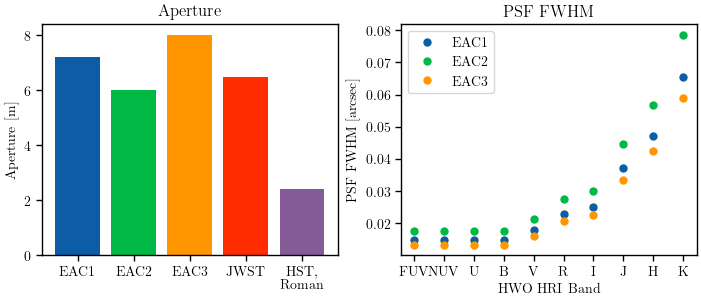

In [33]:
_, ax = plt.subplots(1, 2, figsize=(7, 3), constrained_layout=True)

ax[0].bar('EAC1', eac1.aperture)
ax[0].bar('EAC2', eac2.aperture)
ax[0].bar('EAC3', eac3.aperture)
ax[0].bar('JWST', 6.5)
ax[0].bar('HST,\nRoman', 2.4)
ax[0].set_ylabel('Aperture [m]')
ax[0].set_title('Aperture')

plot_kwargs = {
    'linestyle': 'None',
    'marker': 'o',
    'markersize': 5,
}

x_positions = np.arange(len(eac1.psf_fwhm))
ax[1].plot(x_positions, [v.value for _, v in eac1.psf_fwhm.items()], label='EAC1', **plot_kwargs)
ax[1].plot(x_positions, [v.value for _, v in eac2.psf_fwhm.items()], label='EAC2', **plot_kwargs)
ax[1].plot(x_positions, [v.value for _, v in eac3.psf_fwhm.items()], label='EAC3', **plot_kwargs)
ax[1].set_xticks(x_positions, list(eac1.psf_fwhm.keys()))
ax[1].set_ylabel('PSF FWHM [arcsec]')
ax[1].set_xlabel('HWO HRI Band')
ax[1].set_title('PSF FWHM')
ax[1].legend()

plt.savefig(os.path.join(hwo_dir, 'figures', 'eacs.png'))
plt.show()